# Articulate “Specific aim”

The aim of this project will be to predict the number of refugees who find asylum in countries around the world. I will look into specific variables related to a countries profile (Ex: population, density, area rainfall (ml), GDP (US dollars), etc.)

# Outline proposed methods and models

Methods:
    - Remove any outliers from the data that might skew the distribution
    - Using the key and countries create a folium distribution mapping the refugees in 2010 and 2015
    - After cleaning and EDA, find the variables and type of regressor model that best predicts the target variable
    
Models:
    - Regression model predicting the number of Refugees in each country
    - Decision Tree looking into different scenarios of options.
    - Possible clustering looking into the Continent

# Define risks & assumptions

Risks: The risks include not cleaning the data well enough allowing for countries spelled differently to not contain Data. This will lead to multiple missing data rows, causing the model and EDA to be off. Another risk is the time range, having a small range might not show a range of difference, however this fix shouldn't be too difficult. A risk I currenly have is the rain dataset, some of the data range from 2010 to 2014 which isn't 100% accurate; however, this was one of the best data I could find for scrapping.

Assumptions: One assumption I have made is to look into the years where there have been major political turmoil and wars. I have assumed these years to be 2010 to 2015. Some other assumptions include GDP in American Dollars (millions), Rainfall in ml, Area in miles, and Density in pop/mi.

# Describe data cleaning/munging techniques

The main data cleaning will involve scrapping the data from the links and formatting them into a dataframe. However, I realized there were countries which were spelled differently amongst the dataframes. I found the difference between the dataframes and modified the cell values. After getting the individual dataframes of the attributes I did a left merge to include all the countries in the json file with the variable values. Other techniques involved changing a object numeric type to float, and removing unwanted character

# Bonus

Some additional datasets I found included statistics for the number of children out of school, and the cost of living based on US $. These datasets will show a relationship between a poor country and how many refugees they could allow into their country

# Perform & summarize EDA

In [1]:
import requests
from lxml import html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline

In [2]:
refugees2015 = pd.read_csv('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/Refugees2015.csv', skiprows=2)
refugees2010 = pd.read_csv('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/Refugees2010.csv', skiprows=2)

#Rename and drop the columns listed below.
refugees2010.rename(columns={'Country / territory of asylum/residence': 'Country', 'Refugees (incl. refugee-like situations)': 'Refugees_2010'}, inplace=True)
refugees2015.rename(columns={'Country / territory of asylum/residence': 'Country', 'Refugees (incl. refugee-like situations)': 'Refugees_2015'}, inplace=True)
refugees2010.drop(['Year', 'Origin'], axis = 1, inplace = True)
refugees2015.drop(['Year', 'Origin'], axis = 1, inplace = True)

#Change refugees value to a numeric type.
refugees2015["Refugees_2015"] = pd.to_numeric(refugees2015["Refugees_2015"], errors='coerce')

#Grouping the dataframe by Country and taking the Refugees sum.
refugees2010 = refugees2010.groupby('Country')[['Refugees_2010']].sum()
refugees2015 = refugees2015.groupby('Country')[['Refugees_2015']].sum()

#Reset Index and fill nan's with 0.
refugees2010.reset_index(inplace = True)
refugees2015.reset_index(inplace = True)

refugees2010 = refugees2010.fillna(0)
refugees2015 = refugees2015.fillna(0)

In [3]:
#For sorting purposes I sorted the df by Country ascending.
refugees2010.sort_values(by = 'Country', inplace = True)
refugees2015.sort_values(by = 'Country', inplace = True)

In [4]:
#Using the json file I took the Key (Used in Folium) and the Country name
import json
from pprint import pprint

with open('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/data.json') as data_file:    
    data = json.load(data_file)
    
countryVal = []
idVal = []
i = 0
while i < len(data['features']):
    idVal.append(data['features'][i]['id'])
    countryVal.append(data['features'][i]['properties']['name'])
    i+=1
    
key = pd.DataFrame({'Country': countryVal, 'Key': idVal})

In [5]:
#Looking into the differences in Country names in refugees2010 and key
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
keyList = key['Country'].tolist()
s = set(keyList)
diff_2010 = [x for x in refugee2010List if x not in s]
diff_2015 = [x for x in refugee2015List if x not in s]

In [6]:
print diff_2010 #Difference located in refugee2010 but not key

['Aruba', 'Bahamas', 'Bahrain', 'Bolivia (Plurinational State of)', 'Bonaire', 'British Virgin Islands', 'Brunei Darussalam', 'Cayman Islands', 'Central African Rep.', 'China, Hong Kong SAR', 'China, Macao SAR', 'Congo', 'Cura\xc3\xa7ao', 'Czech Rep.', "C\xc3\xb4te d'Ivoire", 'Dem. Rep. of the Congo', 'Dominican Rep.', 'Grenada', 'Guinea-Bissau', 'Iran (Islamic Rep. of)', 'Liechtenstein', 'Malta', 'Monaco', 'Montserrat', 'Rep. of Korea', 'Rep. of Moldova', 'Russian Federation', 'Saint Lucia', 'Serbia and Kosovo (S/RES/1244 (1999))', 'Singapore', 'Sint Maarten (Dutch part)', 'Syrian Arab Rep.', 'The former Yugoslav Republic of Macedonia', 'Timor-Leste', 'Tonga', 'United Rep. of Tanzania', 'Venezuela (Bolivarian Republic of)', 'Viet Nam']


In [7]:
print keyList #Changed the diff_2010 to these countries.

[u'Afghanistan', u'Angola', u'Albania', u'United Arab Emirates', u'Argentina', u'Armenia', u'Antarctica', u'French Southern and Antarctic Lands', u'Australia', u'Austria', u'Azerbaijan', u'Burundi', u'Belgium', u'Benin', u'Burkina Faso', u'Bangladesh', u'Bulgaria', u'The Bahamas', u'Bosnia and Herzegovina', u'Belarus', u'Belize', u'Bolivia', u'Brazil', u'Brunei', u'Bhutan', u'Botswana', u'Central African Republic', u'Canada', u'Switzerland', u'Chile', u'China', u'Ivory Coast', u'Cameroon', u'Democratic Republic of the Congo', u'Republic of the Congo', u'Colombia', u'Costa Rica', u'Cuba', u'Northern Cyprus', u'Cyprus', u'Czech Republic', u'Germany', u'Djibouti', u'Denmark', u'Dominican Republic', u'Algeria', u'Ecuador', u'Egypt', u'Eritrea', u'Spain', u'Estonia', u'Ethiopia', u'Finland', u'Fiji', u'Falkland Islands', u'France', u'Gabon', u'United Kingdom', u'Georgia', u'Ghana', u'Guinea', u'Gambia', u'Guinea Bissau', u'Equatorial Guinea', u'Greece', u'Greenland', u'Guatemala', u'Guyana'

In [8]:
#Changing the Country's Name
refugees2010['Country'][10] = 'The Bahamas'
refugees2010['Country'][17] = 'Bolivia'
refugees2010['Country'][23] = 'Brunei'
refugees2010['Country'][31] = 'Central African Republic'
refugees2010['Country'][38] = 'Republic of the Congo'
refugees2010['Country'][44] = 'Czech Republic'
refugees2010['Country'][46] = 'Democratic Republic of the Congo'
refugees2010['Country'][49] = 'Dominican Republic'
refugees2010['Country'][76] = 'Iran'
refugees2010['Country'][127] = 'South Korea'
refugees2010['Country'][130] = 'Russia'
refugees2010['Country'][150] = 'Syria'
refugees2010['Country'][153] = 'Macedonia'
refugees2010['Country'][165] = 'United Republic of Tanzania'
refugees2010['Country'][170] = 'Venezuela'
refugees2010['Country'][171] = 'Vietnam'


refugees2015['Country'][10] = 'The Bahamas'
refugees2015['Country'][17] = 'Bolivia'
refugees2015['Country'][21] = 'Brunei'
refugees2015['Country'][30] = 'Central African Republic'
refugees2015['Country'][36] = 'Republic of the Congo'
refugees2015['Country'][41] = 'Czech Republic'
refugees2015['Country'][43] = 'North Korea'
refugees2015['Country'][44] = 'Democratic Republic of the Congo'
refugees2015['Country'][47] = 'Dominican Republic'
refugees2015['Country'][73] = 'Iran'
refugees2015['Country'][126] = 'South Korea'
refugees2015['Country'][127] = 'Moldova'
refugees2015['Country'][129] = 'Russia'
refugees2015['Country'][147] = 'Syria'
refugees2015['Country'][150] = 'Macedonia'
refugees2015['Country'][161] = 'United Republic of Tanzania'
refugees2015['Country'][165] = 'Venezuela'
refugees2015['Country'][166] = 'Vietnam'

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: S

In [9]:
#Request the html for the country's government.
page = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_system_of_government')
tree = html.fromstring(page.text) 

#Xpath
gov = tree.xpath("//div/div/table/tr/td[2]/text()")
country = tree.xpath("//div/div/table/tr/td/a/text()")
country = country[2:197]
gov = gov[2:197]
gov = pd.DataFrame({'country' : country, 'government' : gov})

#Government Dataframe
gov.rename(columns = {'country':'Country'}, inplace = True)
gov.sort_values(by = 'Country', inplace = True)

In [10]:
#Seeing the difference between government Country and refugee Country

refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
govList = gov['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in govList if x not in s]
diff_2015 = [x for x in govList if x not in s2]

In [11]:
print diff_2010 #In Refugee2010 but not in govList

['Andorra', 'Antigua and Barbuda', 'Bahamas, The', 'Barbados', 'Bhutan', 'Cape Verde', "China, People's Republic of", 'Comoros', 'Congo', u"C\xf4te d'Ivoire", 'Dominica', 'East Timor', 'Equatorial Guinea', 'Federated States of Micronesia', 'Gambia, The', 'Holy See', 'Kiribati', 'Korea, North', 'Korea, South', 'Laos', 'Lesotho', 'Maldives', 'Marshall Islands', 'Mauritius', 'Moldova', 'Nauru', 'Palau', 'Palestine', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Serbia', 'Seychelles', 'Solomon Islands', 'South Sudan', u'S\xe3o Tom\xe9 and Pr\xedncipe', 'Tanzania', 'Tuvalu', 'United States']


In [12]:
print govList

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', "China, People's Republic of", 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', u"C\xf4te d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Federated States of Micronesia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See',

In [13]:
#Rename the countrys
gov['Country'][11] = 'The Bahamas'
gov['Country'][35] = 'China'
gov['Country'][38] = 'Republic of the Congo'
gov['Country'][62] = 'Gambia'
gov['Country'][90] = 'North Korea'
gov['Country'][91] = 'South Korea'
gov['Country'][173] = 'United Republic of Tanzania'
gov['Country'][186] = 'United States of America'

In [14]:
#Read an excel file by sheet
GDP_1 = pd.read_excel('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/GDP.xlsx', sheetname='page 1')
GDP_2 = pd.read_excel('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/GDP.xlsx', sheetname='page 2')
GDP_3 = pd.read_excel('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/GDP.xlsx', sheetname='page 3')
GDP_4 = pd.read_excel('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/GDP.xlsx', sheetname='page 4')

#Concat the sheets into a dataframe
frames = [GDP_1, GDP_2, GDP_3, GDP_4]
GDP = pd.concat(frames)

GDP.drop(['Ranking', 'Unnamed: 1', 'Unnamed: 4'], axis=1, inplace=True)

GDP = GDP[0:195]

#Convert the dataframe column to a numeric type
GDP["(millions of\nUS dollars)"] = GDP["(millions of\nUS dollars)"].str.replace(",","")
GDP["(millions of\nUS dollars)"] = pd.to_numeric(GDP["(millions of\nUS dollars)"], errors = 'coerce')

#Fill the GDP with 0, rename column, and sort for reference use.
GDP = GDP.fillna(0)
GDP.rename(columns = {'Economy': 'Country'}, inplace=True)
GDP.sort_values(by = 'Country', inplace = True)

In [15]:
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
GDPList = GDP['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in GDPList if x not in s]
diff_2015 = [x for x in GDPList if x not in s2]

In [16]:
print diff_2010 #Countrys contained in refugee2010

[u'Andorra', u'Antigua and Barbuda', u'Bahamas, The', u'Barbados', u'Bermuda', u'Bhutan', u'Brunei Darussalam', u'Cabo Verde', u'Comoros', u'Congo, Dem. Rep.', u'Congo, Rep.', u"C\xf4te d'Ivoire", u'Dominica', u'Egypt, Arab Rep.', u'Equatorial Guinea', u'Faroe Islands', u'Gambia, The', u'Greenland', u'Hong Kong SAR, China', u'Iran, Islamic Rep.', u'Isle of Man', u'Kiribati', u'Korea, Rep.', u'Kosovo', u'Kyrgyz Republic', u'Lao PDR', u'Lesotho', u'Macao SAR, China', u'Macedonia, FYR', u'Maldives', u'Marshall Islands', u'Mauritius', u'Micronesia, Fed. Sts.', u'Moldova', u'Palau', u'Puerto Rico', u'Russian Federation', u'Samoa', u'Serbia', u'Seychelles', u'Slovak Republic', u'Solomon Islands', u'South Sudan', u'St. Kitts and Nevis', u'St. Lucia', u'St. Vincent and the Grenadines', u'S\xe3o Tom\xe9 and Principe', u'Tanzania', u'Tuvalu', u'United States', u'Venezuela, RB', u'West Bank and Gaza', u'Yemen, Rep.']


In [17]:
print GDPList #Refernce for renaming the countries.

[u'Afghanistan', u'Albania', u'Algeria', u'Andorra', u'Angola', u'Antigua and Barbuda', u'Argentina', u'Armenia', u'Australia', u'Austria', u'Azerbaijan', u'Bahamas, The', u'Bahrain', u'Bangladesh', u'Barbados', u'Belarus', u'Belgium', u'Belize', u'Benin', u'Bermuda', u'Bhutan', u'Bolivia', u'Bosnia and Herzegovina', u'Botswana', u'Brazil', u'Brunei Darussalam', u'Bulgaria', u'Burkina Faso', u'Burundi', u'Cabo Verde', u'Cambodia', u'Cameroon', u'Canada', u'Central African Republic', u'Chad', u'Chile', u'China', u'Colombia', u'Comoros', u'Congo, Dem. Rep.', u'Congo, Rep.', u'Costa Rica', u'Croatia', u'Cuba', u'Cyprus', u'Czech Republic', u"C\xf4te d'Ivoire", u'Denmark', u'Djibouti', u'Dominica', u'Dominican Republic', u'Ecuador', u'Egypt, Arab Rep.', u'El Salvador', u'Equatorial Guinea', u'Estonia', u'Ethiopia', u'Faroe Islands', u'Fiji', u'Finland', u'France', u'Gabon', u'Gambia, The', u'Georgia', u'Germany', u'Ghana', u'Greece', u'Greenland', u'Grenada', u'Guatemala', u'Guinea', u'Gui

In [18]:
GDP.reset_index(inplace = True)

#Rename the country values
GDP['Country'][11] = 'The Bahamas'
GDP['Country'][25] = 'Brunei'
GDP['Country'][39] = 'Democratic Republic of the Congo'
GDP['Country'][40] = 'Republic of the Congo'
GDP['Country'][52] = 'Egypt'
GDP['Country'][62] = 'Gambia'
GDP['Country'][80] = 'Iran'
GDP['Country'][92] = 'South Korea'
GDP['Country'][144] = 'Russia'
GDP['Country'][171] = 'Tanzania'
GDP['Country'][185] = 'United States of America'
GDP['Country'][189] = 'Venezuela'
GDP['Country'][192] = 'Yemen'

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [19]:
#Read the html link and return the population, country
page = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_immigrant_population')
tree = html.fromstring(page.text)

population = tree.xpath('//div/div/table[1]/tr/td[2]/text()')
popfirst = tree.xpath('//div/div/table[1]/tr/td[2]/span/text()')
country = tree.xpath('//div/div/table[1]/tr/td[1]/a/text()')

In [20]:
popfirst = popfirst[0]
population = [popfirst] + population 
#The xpath didn't return the first value so I appended it to the list at the front.

In [21]:
#Subsetting the population and later on adding them.
p1 = population[0:20]
p2 = population[21:76]
p3 = population[77:116]
p4 = population[117:125]
p5 = population[126:129]
p6 = population[130:135]
p7 = population[137:139]
p8 = population[140:142]
p9 = population[144]
p10 = population[146:155]
p11 = population[156:159]
p12 = population[160]
p13 = population[162]
p14 = population[164]
p15 = population[166:178]
p16 = population[179:189]
p17 = population[190:196]
p18 = population[197:199]
p19 = population[201]
p20 = population[203:205]
p21 = population[206:210]
p22 = population[211]
p23 = population[214:216]
p24 = population[217:220]
p25 = population[221]
p26 = population[224]
p27 = population[227:229]

In [22]:
pfirst = p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8
pfirst.append(p9)
psecond = pfirst + p10 + p11
psecond.append(p12)
psecond.append(p13)
psecond.append(p14)
pthird = psecond + p15 + p16 + p17 + p18
pthird.append(p19)
pfour = pthird + p20 + p21
pfour.append(p22)
pfive = pfour + p23 + p24
pfive.append(p25)
pfive.append(p26)
population = pfive + p27

In [23]:
immigrant = pd.DataFrame({'Country' : country, 'Immigrants' : population})

In [24]:
#Taking the refugee list and getting the difference from immigrants
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
immList = immigrant['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in immList if x not in s]
diff_2015 = [x for x in immList if x not in s2]

In [25]:
print diff_2010 #Contain in immigrants but not refugees2010

['United States', 'Ivory Coast', 'Serbia', 'South Sudan', 'Democratic Republic of Congo', 'Republic of Congo', 'Tanzania', 'Palestine', 'The Gambia', 'Moldova', 'Republic of Macedonia', 'Maldives', 'Bahamas', 'Bhutan', 'North Korea', 'Andorra', 'Mauritius', 'Barbados', 'Antigua and Barbuda', 'Sint Maarten', 'Laos', 'Bermuda', 'Cape Verde', 'Comoros', 'Seychelles', 'Saint Vincent and the Grenadines', 'Equatorial Guinea', 'Solomon Islands', 'Dominica', 'Sao Tome and Principe', 'Saint Kitts and Nevis', 'Samoa', 'Palau', 'San Marino', 'Lesotho', 'Kiribati', 'Micronesia', 'Nauru', 'Marshall Islands', 'Vatican City', 'Tokelau', 'Tuvalu']


In [26]:
print refugee2010List #Reference for the immigrant list

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cura\xc3\xa7ao', 'Cyprus', 'Czech Republic', "C\xc3\xb4te d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 

In [27]:
#Change the Country Names
immigrant['Country'][0] = 'United States of America'
immigrant['Country'][64] = 'Democratic Republic of the Congo'
immigrant['Country'][66] = 'Republic of the Congo'
immigrant['Country'][81] = 'United Republic of Tanzania'
immigrant['Country'][109] = 'Gambia'
immigrant['Country'][117] = 'Macedonia'
immigrant['Country'][134] = 'The Bahamas'
immigrant['Country'][166] = 'Guinea'

In [28]:
#Take the population link and scrape.
page = requests.get('https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_population_density')
tree = html.fromstring(page.text)

country = tree.xpath("//div/div/table[1]/tr/td[2]/a/text()")
area = tree.xpath("//div/div/table[1]/tr/td[4]/text()")
pop = tree.xpath("//div/div/table[1]/tr/td[5]/text()")
density = tree.xpath("//div/div/table[1]/tr/td[7]/text()")

c1 = country[1:15]
c2 = country[15:17]
c3 = country[18:78]
c4 = country[78:]
c5 = c1 + c2 + c3 + c4
country = c5

t1 = area[3:17]
t2 = area[18:20]
t3 = area[20:80]
t4 = area[81:]
t5 = t1 + t2 + t3+t4
area = t5

p1 = pop[3:17]
p2 = pop[18:20]
p3 = pop[20:80]
p4 = pop[81:]
p5 = p1 + p2 + p3 + p4
pop = p5

d1 = density[3:17]
d2 = density[18:20]
d3 = density[20:80]
d4 = density[81:]
d5 = d1 + d2 + d3 + d4
density = d5

#Set to a dataframe and rename the columns
population = pd.DataFrame({'country' : country, 'area' : area, 'population' : pop, 'density' : density})
population.rename(columns = {'country': 'Country', 'area': 'Area(mi)', 'density': 'Density(pop/mi)', 'population': 'Population'}, inplace = True)

#Take the population and set it to a numeric type
population["Area(mi)"] = population["Area(mi)"].str.replace(",","")
population["Density(pop/mi)"] = population["Density(pop/mi)"].str.replace(",","")
population["Population"] = population["Population"].str.replace(",","")

population["Area(mi)"] = pd.to_numeric(population["Area(mi)"], errors='coerce')
population["Density(pop/mi)"] = pd.to_numeric(population["Density(pop/mi)"], errors='coerce')
population["Population"] = pd.to_numeric(population["Population"], errors='coerce')

In [29]:
#Find values contained in population but not refugees
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
popList = population['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in popList if x not in s]
diff_2015 = [x for x in popList if x not in s2]

In [30]:
print diff_2010 #Countries in population

['UK', 'Vatican City', 'UK', 'Kingdom of the Netherlands', 'Maldives', 'UK', 'UK', 'Taiwan', 'Barbados', 'Mauritius', 'San Marino', 'Kingdom of the Netherlands', 'Nauru', 'Tuvalu', 'Comoros', 'US', 'Kingdom of the Netherlands', 'Marshall Islands', 'US', 'US', 'US', 'Saint Vincent and the Grenadines', 'UK', 'Seychelles', 'North Korea', 'UK', 'Antigua and Barbuda', 'Saint Kitts and Nevis', u'S\xe3o Tom\xe9 and Pr\xedncipe', 'Kosovo', 'Andorra', 'Kiribati', 'Federated States of Micronesia', 'NZ', 'UK', 'Cape Verde', 'US', 'Moldova', 'Dominica', 'Serbia', 'Northern Cyprus', 'Ivory Coast', 'Lesotho', 'Samoa', 'UK', 'NZ', 'Tanzania', 'Equatorial Guinea', 'UK', 'Palau', 'UK', 'United States', 'Laos', 'Bahamas', 'Bhutan', 'Solomon Islands', 'South Sudan', 'NZ', 'Western Sahara', 'UK', 'UK']


In [31]:
print refugee2010List #In reference to the population

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cura\xc3\xa7ao', 'Cyprus', 'Czech Republic', "C\xc3\xb4te d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 

In [32]:
population['Country'][4] = 'United Kingdom'
population['Country'][8] = 'United Kingdom'
population['Country'][10] = 'Netherlands'
population['Country'][12] = 'United Kingdom'
population['Country'][13] = 'United Kingdom'
population['Country'][21] = 'Netherlands'
population['Country'][32] = 'United States of America'
population['Country'][37] = 'Netherlands'
population['Country'][42] = 'United States of America'
population['Country'][45] = 'United States of America'
population['Country'][46] = 'United States of America'
population['Country'][59] = 'United Kingdom'
population['Country'][66] = 'United Kingdom'
population['Country'][82] = 'New Zealand'
population['Country'][83] = 'United Kingdom'
population['Country'][91] = 'United States of America'
population['Country'][147] = 'United Kingdom'
population['Country'][148] = 'New Zealand'
population['Country'][150] = 'United Republic of Tanzania'
population['Country'][157] = 'United Kingdom'
population['Country'][176] = 'United Kingdom'
population['Country'][179] = 'United States of America'
population['Country'][187] = 'The Bahamas'
population['Country'][225] = 'New Zealand'
population['Country'][238] = 'United Kingdom'
population['Country'][239] = 'United Kingdom'

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/envs/dsi/lib/python2.7/site-packag

In [33]:
#I will take the total population and the average Density, Population, Area while grouping
p_df = population.groupby('Country')[['Population']].sum()
p_df = p_df.reset_index()
population.drop(['Population'], axis = 1, inplace = True)
population_final = pd.merge(population, p_df, on = 'Country', how = 'inner')
population = population_final.groupby('Country')[['Density(pop/mi)', 'Population', 'Area(mi)']].mean()
population = population.reset_index()
population.sort_values(by = 'Population', ascending = False)

,Country,Density(pop/mi),Population,Area(mi)
34,China,24275.813333,1386883665,1.240927e+06
73,India,1022.900000,1298281200,1.269211e+06
187,United States,85.480000,324546782,3.796742e+06
74,Indonesia,355.000000,260581000,7.353580e+05
22,Brazil,62.000000,202768562,3.287956e+06
128,Pakistan,626.070000,194333088,3.104030e+05
123,Nigeria,523.000000,186988000,3.566690e+05
12,Bangladesh,2898.150000,161131258,5.559800e+04
140,Russia,21.800000,143975923,6.601668e+06
82,Japan,870.000000,126920000,1.459250e+05


In [34]:
#Continent data frame
continent = pd.read_csv('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/Countries-Continents-csv.csv')
continent.drop(['Column', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9'], axis = 1, inplace = True)

In [35]:
#Finding the countrys in continent but not in refugees
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
contList = continent['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in contList if x not in s]
diff_2015 = [x for x in contList if x not in s2]

In [36]:
print diff_2010

['Burkina', 'Cape Verde', 'Comoros', 'Congo', 'Congo, Democratic Republic of', 'Equatorial Guinea', 'Ivory Coast', 'Lesotho', 'Mauritius', 'Sao Tome and Principe', 'Seychelles', 'South Sudan', 'Tanzania', 'Bhutan', 'Burma (Myanmar)', 'East Timor', 'Korea, North', 'Korea, South', 'Laos', 'Maldives', 'Russian Federation', 'Andorra', 'Moldova', 'San Marino', 'Serbia', 'Vatican City', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Dominica', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'United States', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'Palau', 'Samoa', 'Solomon Islands', 'Tuvalu']


In [37]:
#In reference
print refugee2010List

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cura\xc3\xa7ao', 'Cyprus', 'Czech Republic', "C\xc3\xb4te d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 

In [38]:
#Rename the cell value
continent['Country'][11] = 'Republic of the Congo'
continent['Country'][12] = 'Democratic Republic of the Congo'
continent['Country'][48] = 'United Republic of Tanzania'
continent['Country'][59] = 'Myanmar'
continent['Country'][71] = 'North Korea'
continent['Country'][72] = 'South Korea'
continent['Country'][85] = 'Russia'
continent['Country'][147] = 'The Bahamas'
continent['Country'][167] = 'United States of America'

In [39]:
#Reading the data for rain and scraping the Country and rain fall in ml
page = requests.get('http://www.nationmaster.com/country-info/stats/Geography/Average-precipitation-in-depth/Mm-per-year')
tree = html.fromstring(page.text)

country = tree.xpath("//div/div/table/tbody/tr/td[2]/a/span/text()")
rain = tree.xpath("//div/div/table/tbody/tr/td[@class = 'amount']/text()")

rain = pd.DataFrame({'Country' : country, 'Rain(ml)' : rain})

In [40]:
rain['Rain(ml)'] = rain['Rain(ml)'].map(lambda x: x.lstrip('\r\n                  ').rstrip('\r\n            '))

In [41]:
#Take the numeric value.
rain["Rain(ml)"] = rain["Rain(ml)"].str.replace(",","")
rain["Rain(ml)"] = pd.to_numeric(rain["Rain(ml)"], errors = 'coerce')

In [42]:
#Take the difference in rain list and refugees
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
rainList = rain['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in rainList if x not in s]
diff_2015 = [x for x in rainList if x not in s2]

In [43]:
print diff_2010

['Sao Tome and Principe', 'Solomon Islands', 'Seychelles', 'Bhutan', 'Equatorial Guinea', 'Burma', 'Dominica', 'Puerto Rico', 'Mauritius', 'Maldives', 'Laos', 'Former Spanish colonies', 'Latin America and Caribbean', 'Saint Vincent and the Grenadines', 'East Timor', 'Saint Kitts and Nevis', 'Barbados', 'Hot countries', 'Catholic countries', 'South Asia', "Cote d'Ivoire", 'Christian countries', 'Former British colonies', 'Emerging markets', 'Heavily indebted countries', 'Sub-Saharan Africa', 'Tanzania', 'South and Central Asia', 'North Korea', 'Antigua and Barbuda', 'Religious countries', 'Sparsely populated countries', 'Former French colonies', 'High income OECD countries', 'Group of 7 countries (G7)', 'Cold countries', 'Comoros', 'failed states', 'Non-religious countries', 'NATO countries', 'Europe', 'The Gambia', 'Eastern Europe', 'Lesotho', 'Eurozone', 'European Union', 'United States', 'Muslim countries', 'Republic of Macedonia', 'Former Soviet republics', 'OPEC countries', 'Moldov

In [44]:
rain['Country'][54] = 'Guinea Bissau'
rain['Country'][96] = 'United Republic of Tanzania'
rain['Country'][122] = 'Gambia'
rain['Country'][133] = 'United States of America'
rain['Country'][151] = 'Macedonia'

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/envs/dsi/lib/python2.7/site-packag

In [45]:
#Murder Rate by Country
page = requests.get('http://www.nationmaster.com/country-info/stats/Crime/Murder-rate')
tree = html.fromstring(page.text)

murder = tree.xpath('//div/div/table/tbody/tr/td[2]/text()')
country = tree.xpath('//div/div/table/tbody/tr/td/a/span/text()')

murder = murder[0:151]
murder = pd.DataFrame({'Country' : country, 'Murder Rate' : murder})

In [46]:
refugee2010List = refugees2010['Country'].tolist()
refugee2015List = refugees2015['Country'].tolist()
murList = murder['Country'].tolist()
s = set(refugee2010List)
s2 = set(refugee2015List)
diff_2010 = [x for x in murList if x not in s]
diff_2015 = [x for x in murList if x not in s2]

In [47]:
print diff_2010
#Tanzania to United Republic of Tanzania [137]
#United States to United States of America [145]

['Andorra', 'Antigua and Barbuda', 'Barbados', 'Bhutan', 'Cape Verde', 'Comoros', 'Dominica', 'East Timor', 'Equatorial Guinea', 'Lesotho', 'Maldives', 'Mauritius', 'Moldova', 'Northern Ireland', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Scotland', 'Seychelles', 'Soviet Union', 'Tanzania', 'United States']


In [48]:
murder['Country'][137] = 'United Republic of Tanzania'
murder['Country'][145] = 'United States of America'

In [49]:
#Merging the tables together
rain2010 = pd.merge(key, rain, on = 'Country', how = 'left')
refugees2010 = pd.merge(key, refugees2010, on = 'Country', how = 'left')
refugees2015 = pd.merge(key, refugees2015, on = 'Country', how = 'left')
gov2010 = pd.merge(key, gov, on = 'Country', how = 'left')
gdp2010 = pd.merge(key, GDP, on = 'Country', how = 'left')
immigrant2010 = pd.merge(key, immigrant, on = 'Country', how = 'left')
population_2010 = pd.merge(key, population, on = 'Country', how = 'left')
continent_2010 = pd.merge(key, continent, on = 'Country', how = 'left')
murder2010 = pd.merge(key, murder, on = 'Country', how = 'left')

//anaconda/envs/dsi/lib/python2.7/site-packages/pandas/tools/merge.py:714: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


In [50]:
#Drop Key
gov2010.drop('Key', axis = 1, inplace = True)
gdp2010.drop('Key', axis = 1, inplace = True)
immigrant2010.drop('Key', axis = 1, inplace = True)
population_2010.drop('Key', axis = 1, inplace = True)
refugees2015.drop('Key', axis = 1, inplace = True)
continent_2010.drop('Key', axis = 1, inplace = True)
rain2010.drop('Key', axis = 1, inplace = True)
murder2010.drop('Key', axis = 1, inplace = True)

In [51]:
ref_gov = pd.merge(refugees2010, gov2010, on = 'Country', how = 'left')
gov_gdp = pd.merge(ref_gov, gdp2010, on = 'Country', how = 'left')
gdp_imm = pd.merge(gov_gdp, immigrant2010, on = 'Country', how = 'left')
gdp_count = pd.merge(gdp_imm, continent_2010, on = 'Country', how = 'left')
gdp_rain = pd.merge(gdp_count, rain2010, on = 'Country', how = 'left')
gdp_mur = pd.merge(gdp_rain, murder2010, on = 'Country', how = 'left')
final2010 = pd.merge(gdp_mur, population_2010, on = 'Country', how = 'left')

In [52]:
#Merge the 2010 refugees with the 2015 refugees
final = pd.merge(refugees2015, final2010, on = 'Country', how = 'left')

In [53]:
#Drop the index column
final.drop('index', axis = 1, inplace = True)

In [54]:
final

,Country,Refugees_2015,Key,Refugees_2010,government,(millions of US dollars),Immigrants,Continent,Rain(ml),Murder Rate,Density(pop/mi),Population,Area(mi)
0,Afghanistan,257553.0,AFG,6434.0,Republic,19199.0,"105,090",Asia,327.0,3.4,101.000000,25500100.0,249347.00
1,Angola,15537.0,AGO,15155.0,Republic,102643.0,"87,436",Africa,1010.0,NaN,43.000000,20609294.0,481354.00
2,Albania,79.0,ALB,76.0,Constitutional monarchy,11456.0,"57,616",Europe,1485.0,4.5,254.000000,2821977.0,11082.00
3,United Arab Emirates,658.0,ARE,538.0,Republic,370293.0,"7,826,981",Asia,78.0,0.92,256.000000,8264070.0,32278.00
4,Argentina,3142.0,ARG,3276.0,Constitutional monarchy,548055.0,"1,885,678",South America,591.0,5.5,37.000000,40117096.0,1073518.00
5,Armenia,19309.0,ARM,3296.0,Republic,10561.0,"317,001",Europe,562.0,2.5,264.000000,3024100.0,11484.00
6,Antarctica,NaN,ATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,French Southern and Antarctic Lands,NaN,ATF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Australia,36827.0,AUS,21805.0,Republic,1339539.0,"6,763,663",Oceania,534.0,1.3,79.787500,24201454.0,742494.75
9,Austria,72158.0,AUT,42630.0,Constitutional monarchy,374056.0,"1,492,374",Europe,1110.0,0.55,264.000000,8572895.0,32386.00


In [55]:
final_df = final.copy() #Copy to drop the nan

In [56]:
final_df.dropna(inplace = True)

In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 175
Data columns (total 13 columns):
Country                     118 non-null object
Refugees_2015               118 non-null float64
Key                         118 non-null object
Refugees_2010               118 non-null float64
government                  118 non-null object
(millions of
US dollars)    118 non-null float64
Immigrants                  118 non-null object
Continent                   118 non-null object
Rain(ml)                    118 non-null float64
Murder Rate                 118 non-null object
Density(pop/mi)             118 non-null float64
Population                  118 non-null float64
Area(mi)                    118 non-null float64
dtypes: float64(7), object(6)
memory usage: 12.9+ KB


In [58]:
final_df.columns

Index([                  u'Country',             u'Refugees_2015',
                             u'Key',             u'Refugees_2010',
                      u'government', u'(millions of\nUS dollars)',
                      u'Immigrants',                 u'Continent',
                        u'Rain(ml)',               u'Murder Rate',
                 u'Density(pop/mi)',                u'Population',
                        u'Area(mi)'],
      dtype='object')

In [59]:
#Change Immigrants to numeric type
final_df["Immigrants"] = final_df["Immigrants"].str.replace(",","")
final_df["Immigrants"] = pd.to_numeric(final_df["Immigrants"], errors='coerce')
final_df["Murder Rate"] = pd.to_numeric(final_df["Murder Rate"], errors = 'coerce')

In [60]:
#Changing order of the dataframe
final_df = final_df[['Country', 'Key', 'Continent', 'Refugees_2010', 'Refugees_2015', 'Murder Rate', 'government', 
                     '(millions of\nUS dollars)', 'Immigrants', 'Rain(ml)', 'Density(pop/mi)', 'Population', 'Area(mi)']]

In [61]:
final_df

,Country,Key,Continent,Refugees_2010,Refugees_2015,Murder Rate,government,(millions of US dollars),Immigrants,Rain(ml),Density(pop/mi),Population,Area(mi)
0,Afghanistan,AFG,Asia,6434.0,257553.0,3.40,Republic,19199.0,105090,327.0,101.000000,2.550010e+07,249347.00
2,Albania,ALB,Europe,76.0,79.0,4.50,Constitutional monarchy,11456.0,57616,1485.0,254.000000,2.821977e+06,11082.00
3,United Arab Emirates,ARE,Asia,538.0,658.0,0.92,Republic,370293.0,7826981,78.0,256.000000,8.264070e+06,32278.00
4,Argentina,ARG,South America,3276.0,3142.0,5.50,Constitutional monarchy,548055.0,1885678,591.0,37.000000,4.011710e+07,1073518.00
5,Armenia,ARM,Europe,3296.0,19309.0,2.50,Republic,10561.0,317001,562.0,264.000000,3.024100e+06,11484.00
8,Australia,AUS,Oceania,21805.0,36827.0,1.30,Republic,1339539.0,6763663,534.0,79.787500,2.420145e+07,742494.75
9,Austria,AUT,Europe,42630.0,72158.0,0.55,Constitutional monarchy,374056.0,1492374,1110.0,264.000000,8.572895e+06,32386.00
10,Azerbaijan,AZE,Europe,1891.0,1269.0,2.00,Constitutional monarchy,53047.0,323843,447.0,282.000000,9.477100e+06,33436.00
11,Burundi,BDI,Africa,29365.0,53356.0,37.00,Republic,3085.0,254477,1274.0,1075.000000,1.155256e+07,10740.00
12,Belgium,BEL,Europe,17892.0,35267.0,1.82,Republic,454039.0,1387940,847.0,961.000000,1.132392e+07,11787.00


In [62]:
final_df.rename(columns={'government' : 'Government', '(millions of\nUS dollars)' : 'GDP($ in million)'}, inplace=True)

In [63]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Refugees_2010,118.0,7.154286e+04,2.179953e+05,0.00,390.750,3607.00,4.203750e+04,1.900621e+06
Refugees_2015,118.0,1.116932e+05,3.093997e+05,0.00,485.000,3584.00,8.468500e+04,2.541308e+06
Murder Rate,118.0,9.078983e+00,1.408162e+01,0.00,1.300,2.80,1.050000e+01,7.100000e+01
GDP($ in million),118.0,5.759634e+05,1.988497e+06,1503.00,21333.500,68679.00,3.604145e+05,1.794700e+07
Immigrants,118.0,1.796261e+06,4.768165e+06,13336.00,148424.500,359072.00,1.468409e+06,4.662710e+07
Rain(ml),118.0,1.094305e+03,7.562744e+02,51.00,543.250,860.50,1.617500e+03,2.926000e+03
Density(pop/mi),118.0,5.134223e+02,2.238350e+03,4.97,80.750,199.86,3.775000e+02,2.427581e+04
Population,118.0,5.372545e+07,1.763697e+08,324528.00,4684151.000,11143484.00,3.802200e+07,1.386884e+09
Area(mi),118.0,3.119097e+05,7.815287e+05,998.00,25452.875,78055.00,2.900706e+05,6.601668e+06


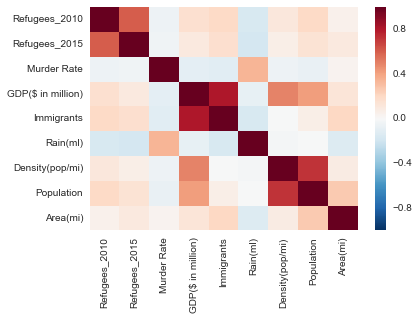

In [64]:
sns.heatmap(final_df.corr())

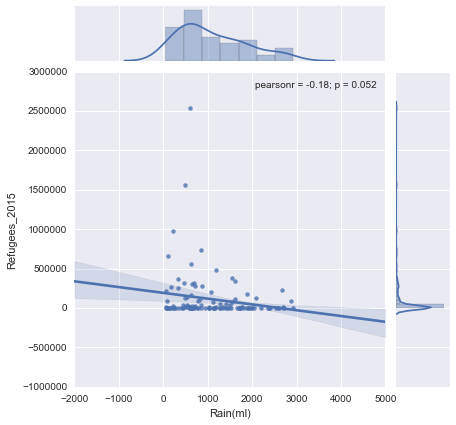

In [65]:
g = sns.jointplot("Rain(ml)", "Refugees_2015", data=final_df, kind="reg")
#Negative relationship between rain fall and Refugees 2015

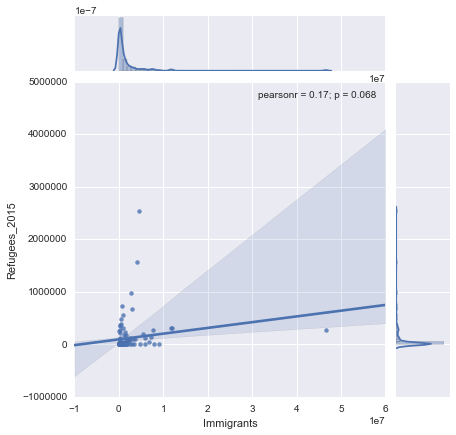

In [66]:
g = sns.jointplot("Immigrants", "Refugees_2015", data=final_df, kind="reg")
#Positive relationship between Immigrants and number of Refugees (2015)

# Data Dictionary

In [67]:
final_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Government', u'GDP($ in million)', u'Immigrants',
       u'Rain(ml)', u'Density(pop/mi)', u'Population', u'Area(mi)'],
      dtype='object')

In [69]:
data_dict = { 'Country' : [final_df['Country'].dtypes, 'Country of the World', len(final_df['Country'])],
               'Key' : [final_df['Key'].dtypes, 'Key used for Folium', len(final_df['Key'])],
               'Continent' : [final_df['Continent'].dtypes, 'Continent of the Country', len(final_df['Continent'])],
               'Refugees_2010' : [final_df['Refugees_2010'].dtypes, 'Refugees in 2010', len(final_df['Refugees_2010'])],
               'Refugees_2015' : [final_df['Refugees_2015'].dtypes, 'Refugees in 2015', len(final_df['Refugees_2015'])],
               'Murder Rate' : [final_df['Murder Rate'].dtypes, 'Murder Rate per 100,000', len(final_df['Murder Rate'])],
               'Government' : [final_df['Government'].dtypes, 'Government of the Country', len(final_df['Government'])],
               'GDP($ in million)' : [final_df['GDP($ in million)'].dtypes, 'GDP in US$ millions', len(final_df['GDP($ in million)'])],
               'Immigrants' : [final_df['Immigrants'].dtypes, 'Number of Immigrant Population', len(final_df['Immigrants'])],
               'Rain(ml)' : [final_df['Rain(ml)'].dtypes, 'Rain in ml per year', len(final_df['Rain(ml)'])],
               'Density(pop/mi)' : [final_df['Density(pop/mi)'].dtypes, 'Density based on population and miles', len(final_df['Density(pop/mi)'])],
               'Population' : [final_df['Population'].dtypes, 'Population for each country', len(final_df['Population'])],
               'Area(mi)' : [final_df['Area(mi)'].dtypes, 'Area in miles', len(final_df['Area(mi)'])]
            }

data_dict

{'Area(mi)': [dtype('float64'), 'Area in miles', 118],
 'Continent': [dtype('O'), 'Continent of the Country', 118],
 'Country': [dtype('O'), 'Country of the World', 118],
 'Density(pop/mi)': [dtype('float64'),
  'Density based on population and miles',
  118],
 'GDP($ in million)': [dtype('float64'), 'GDP in US$ millions', 118],
 'Government': [dtype('O'), 'Government of the Country', 118],
 'Immigrants': [dtype('int64'), 'Number of Immigrant Population', 118],
 'Key': [dtype('O'), 'Key used for Folium', 118],
 'Murder Rate': [dtype('float64'), 'Murder Rate per 100,000', 118],
 'Population': [dtype('float64'), 'Population for each country', 118],
 'Rain(ml)': [dtype('float64'), 'Rain in ml per year', 118],
 'Refugees_2010': [dtype('float64'), 'Refugees in 2010', 118],
 'Refugees_2015': [dtype('float64'), 'Refugees in 2015', 118]}